# Part I - Proper Loan
## by AWOLAJU Saheed

## Introduction

### prosperLoanData


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
loan = pd.read_csv('prosperLoanData.csv')

#### Declaring order for ordered variables

In [52]:
loan['NewLoanStatus'] = loan['LoanStatus']
mask=loan['NewLoanStatus'].str.contains('Past Due')
loan.loc[mask,'NewLoanStatus'] = 'Past Due'


In [53]:
loan_status_order = ['Completed','FinalPaymentInProgress','Current','Past Due,','Chargedoff','Defaulted','Cancelled']

loan_status_order2=loan_status_order = ['Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (60-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Chargedoff','Defaulted','Cancelled']

income_order =['Not Employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$70,000-99,999','$100,000+','Not Displayed']

CreditGrade_order=['AA','A','B','C','D','E','HR','NC']

In [78]:
def plot_scatter(dataframe,x_axis,y_axis,hue_var=None,order=None,hue_order=None,):
    
    # This function is used for plotting my commonest plot, the scatterplot.
    fig = plt.figure(figsize=(10,6))
    sb.stripplot(data=dataframe,x=x_axis,y=y_axis,hue=hue_var,hue_order=hue_order,order=order,size=2,jitter=0.35,palette='RdYlGn_r',dodge=True)
   
    plt.title(f'Relationship between {x_axis} and {y_axis} by {hue_var}',fontsize=16,weight='bold')
    plt.xlabel(x_axis,fontsize=10,weight='bold')
    plt.ylabel(y_axis,fontsize=10,weight='bold')
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5),title=hue_var,title_fontsize=12);
    
    

In [3]:
loan.shape

(113937, 81)

In [4]:
loan.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
60066,CA7E3547532800682B96CEE,593447,2012-05-28 10:57:10.347000000,NaN,60,Current,NaN,0.27462,0.2489,0.2389,...,-94.67,0.0,0.0,0.0,0.0,1.0,0,0,0.0,11
16683,37A2356755019514958BFF8,698820,2013-01-13 09:22:07.850000000,NaN,36,Current,NaN,0.28032,0.2419,0.2319,...,-28.48,0.0,0.0,0.0,0.0,1.0,0,0,0.0,68
50248,F3C43472839789440DB3045,441696,2010-01-08 12:11:39.310000000,NaN,36,Completed,2012-10-30 00:00:00,0.12480,0.0894,0.0794,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,66
33635,C7A635808376437630D6709,804240,2013-06-10 15:39:23.047000000,NaN,36,Current,NaN,0.26528,0.2272,0.2172,...,-62.28,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
1919,29B434202610164516132CC,333584,2008-05-15 19:24:26.900000000,D,36,Completed,2011-05-27 00:00:00,0.14030,0.1190,0.1090,...,-22.87,0.0,0.0,0.0,0.0,1.0,0,0,0.0,44


In [54]:
loan.rename({'ListingCategory (numeric)':'ListingCategory'},axis=1,inplace=True)

In [8]:
loan.sort_index(axis=1,inplace=True)

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   AmountDelinquent                     106315 non-null  float64
 1   AvailableBankcardCredit              106393 non-null  float64
 2   BankcardUtilization                  106333 non-null  float64
 3   BorrowerAPR                          113912 non-null  float64
 4   BorrowerRate                         113937 non-null  float64
 5   BorrowerState                        108422 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   CreditGrade                          28953 non-null   object 
 8   CreditScoreRangeLower                113346 non-null  float64
 9   CreditScoreRangeUpper                113346 non-null  float64
 10  CurrentCreditLines                   106333 non-null  float64
 11  CurrentDelinq

### What is the structure of your dataset?

My dataset has 113937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?


BorrowerRate
CreditGrade
CurrentCreditLines
DebtToIncomeRatio
IncomeRange
IsBorrowerHomeowner
ListingCategory
LoanOriginalAmount
LoanStatus
Occupation
Recommendations
Term


## Univariate Exploration
 


### The number of each loan status

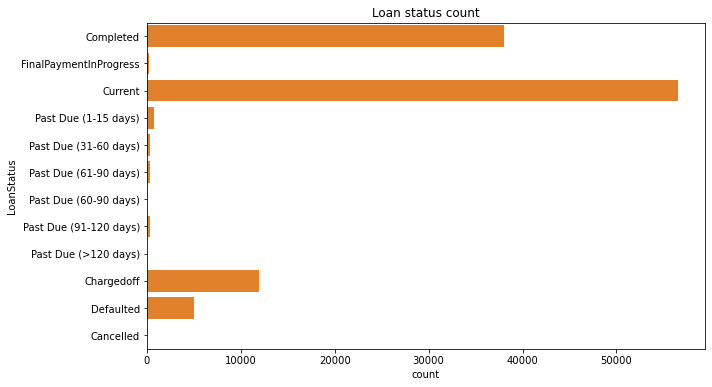

In [81]:
fig = plt.figure(figsize=(10,6))
color =sb.color_palette()[1]
sb.countplot(data=loan,y='LoanStatus',color=color,order=loan_status_order)
plt.title('Loan status count');
# plt.xticks(rotation=60);

#### Observation: Most of the borrowers have either completed their loan payment or currently servicinng the loan. There are considerable amount of charge-offs of over 10000 loans and very low defaults of varying periods


### The income range of borrowers of proper loan

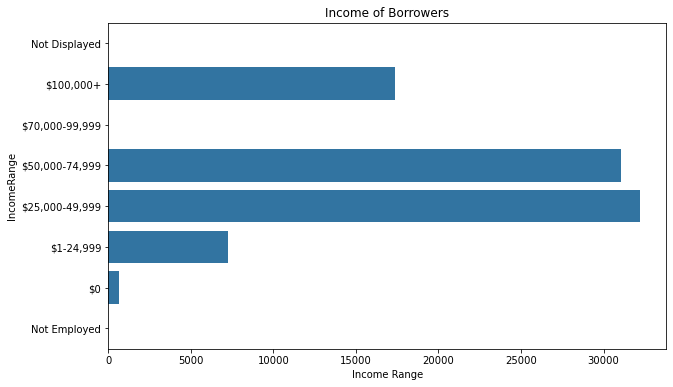

In [84]:
fig = plt.figure(figsize=(10,6))
a= sb.countplot(y=loan['IncomeRange'],color=color,order=income_order)
plt.xlabel('Income Range')
# plt.xticks(rotation=60)
a.invert_yaxis()
plt.title('Income of Borrowers');

#### Observation: Most borrowers earn between 25,000 and 100,000. A lot others also earn more than 100,000.  

### The Distribution of BorrowerRate

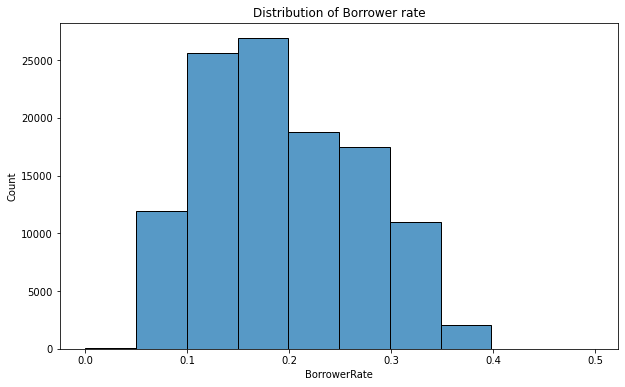

In [145]:
fig = plt.figure(figsize=(10,6))
sb.histplot(x=loan['BorrowerRate'],bins=10)
plt.title('Distribution of Borrower rate');

#### Observation: Most loans were given at rate between 0 and 0.2 While there are loans as high as 0.4 and some in between those.

### The distribution of the LoanOriginalAMount

<AxesSubplot:xlabel='LoanOriginalAmount', ylabel='Count'>

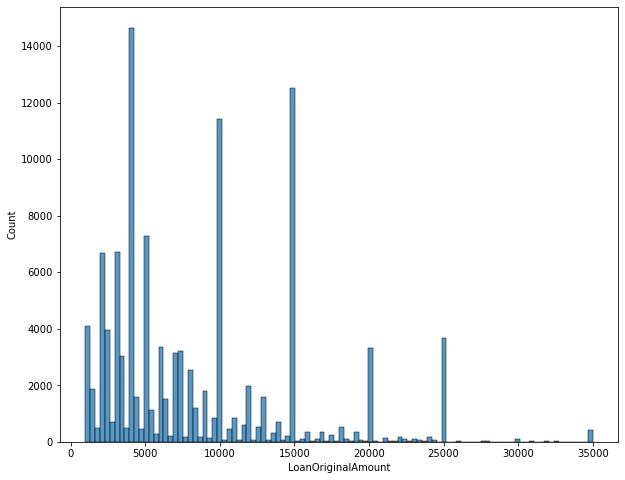

In [7]:
plt.figure(figsize=[10,8])
sb.histplot(x=loan.LoanOriginalAmount)
plt.xlabel('Loan Amount ($)')
plt.title('Number of Loans by their Amounts');

#### A large proportion of the loans are small loans although there are some as high as 35000

### What people are doing with loans

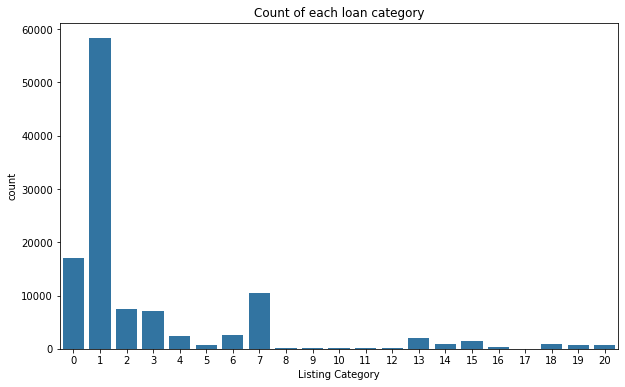

In [146]:
fig = plt.figure(figsize=(10,6))
color = sb.color_palette()[0]
sb.countplot(data=loan,x='ListingCategory',color=color)
plt.title('Count of each loan category')
plt.xlabel('Listing Category');

#### Most of the loans were used for debt consolidation.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


Distribution of Loan Status
3900 of the borrower were completed while about 5900 are currently running.
About 1000 have been charged off,around 500 are default. There were also some defaulted loans by different number of days.

Distribution of IncomeRange of borrowers
About 3500 of the borrowers had income range between 25000 and 50000, similar number of borrowers have income range between 
50000 and 75000.
About 1700 borrowers have income between 75000 and 100000. Similar number of borrowers have income of more than 100000

Distribution of Borrower Rate
Majority of the borrower rate are between 0.1 and 0.2 while there are decreasing numbers of loans at increasing 0.2 and 0.3
Also a further reducing number of loans between 0.3 and 0.4.

What people are doing with loans
From the list category above, it was deduced that most borrowers are borrowing to service previous loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I did not perform any tidying,most of the nan values occur at columns that are not of interest

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Relationship between LoanOriginalAmount and BorrowerRate

Text(0.5, 1.0, 'Relationship between loanOriginalAmount and BorrowerRate')

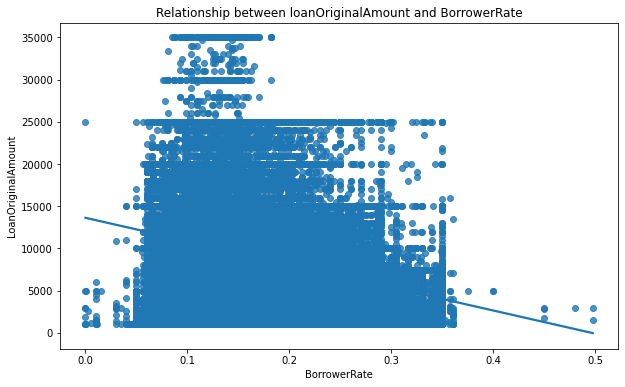

In [147]:
fig = plt.figure(figsize=(10,6))
sb.regplot(data=loan, y='LoanOriginalAmount',x='BorrowerRate')
plt.title('Relationship between loanOriginalAmount and BorrowerRate')

#### There is negative correlation between LoanOriginalAmount and BorrowRate

### Relationship between BorrowerAPR and BorrowerRate

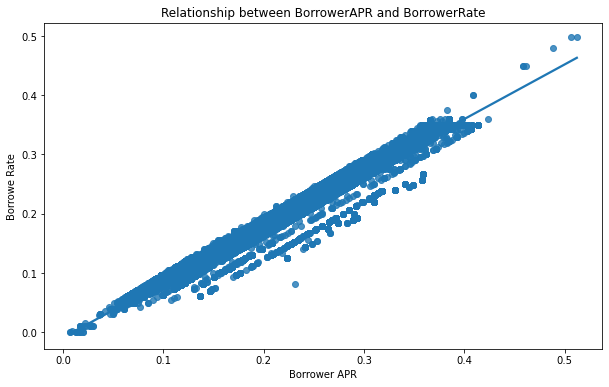

In [148]:
fig = plt.figure(figsize=(10,6))
sb.regplot(data=loan,x='BorrowerAPR',y='BorrowerRate')
plt.title('Relationship between BorrowerAPR and BorrowerRate')
plt.xlabel('Borrower APR')
plt.ylabel('Borrowe Rate');

#### BorrowerRate goes up as BorrowerAPR goes up

### Relationship between BorrowerRate and LoanStatus

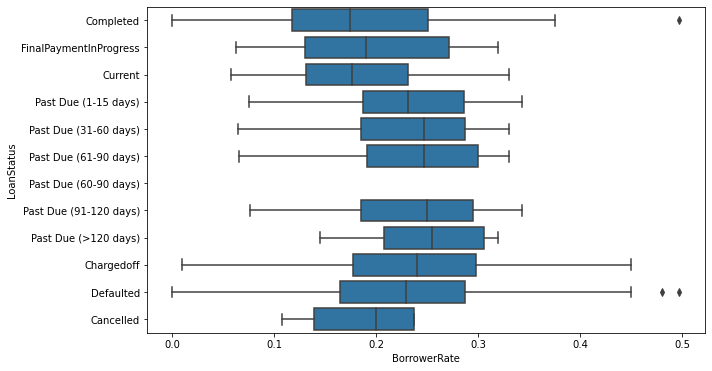

In [83]:
fig = plt.figure(figsize=(10,6))
color = sb.color_palette()[0]
sb.boxplot(data=loan,y='LoanStatus',x='BorrowerRate',color=color,order=loan_status_order);
# plt.xticks(rotation=60);

#### Borrowers who completed there loan have the lowest mean BorrowerRate.

### Relationship between Loan Amount and Term(Duration of Payment in Months

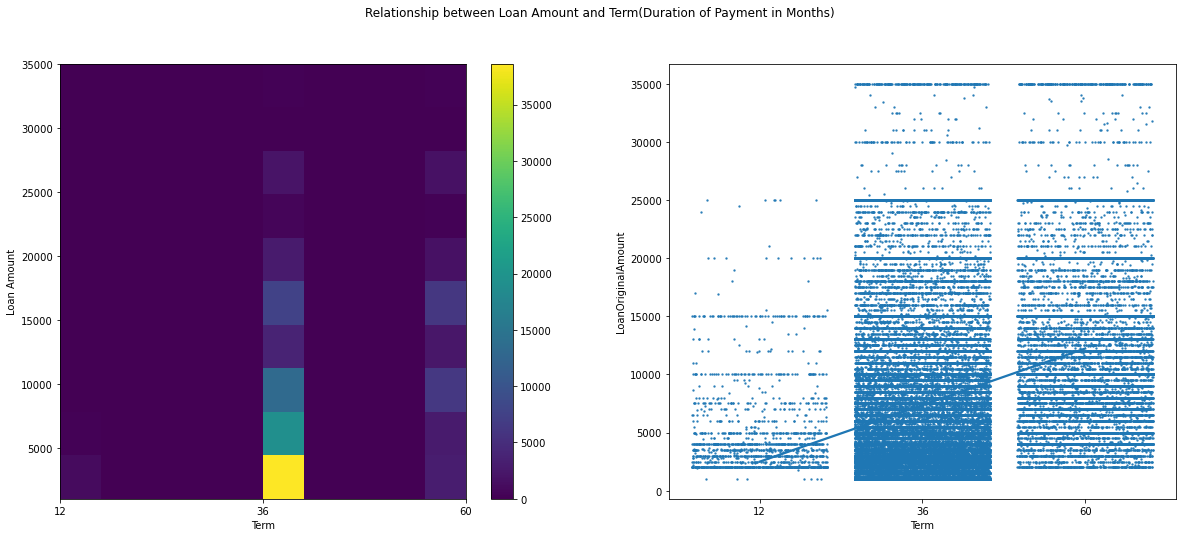

In [77]:
fig = plt.figure(figsize=[20,8],)
plt.suptitle('Relationship between Loan Amount and Term(Duration of Payment in Months)')

plt.subplot(1,2,1)
plt.ylabel('Loan Amount')
plt.xlabel('Term')
plt.hist2d(data=loan,x='Term',y='LoanOriginalAmount')

plt.ylabel('Loan Amount')
plt.xlabel('Term')
plt.colorbar()
plt.xticks(ticks=[12,36,60],labels=[12,36,60]);

plt.subplot(1,2,2)
plt.ylabel('Loan Amount')
plt.xlabel('Term')
sb.regplot(data=loan, x='Term',y='LoanOriginalAmount',x_jitter=10,scatter_kws={'s':2});
plt.xticks(ticks=[12,36,60],labels=[12,36,60]);


#### There is positive correlation between LoanOriginalAmount  and Term of payment.

### Home ownership of each employment categories

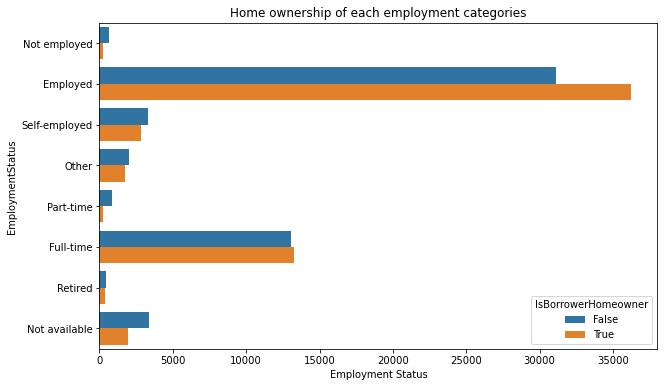

In [150]:
fig = plt.figure(figsize=(10,6))
sb.countplot(data=loan,y='EmploymentStatus',hue='IsBorrowerHomeowner')
plt.title('Home ownership of each employment categories')
plt.xlabel('Employment Status');
# plt.xticks(rotation=60);

#### Among the borrowers, home ownership cut across all employment categories. There is no special relatioship between the two variables

### Relationship between LoanStatus and ListingCategory

Text(0.5, 0, 'Listing Category')

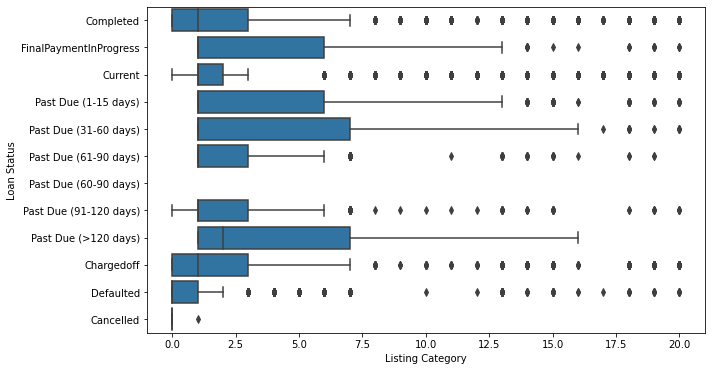

In [151]:
fig = plt.figure(figsize=(10,6))
color=sb.color_palette()[0]
sb.boxplot(data=loan,y='LoanStatus',x='ListingCategory', color=color,order=loan_status_order2);
# plt.xticks(rotation = 60)
plt.ylabel('Loan Status')
plt.xlabel('Listing Category')
# plt.xlim(-1,16);

#### It looks like those who completed their loan have an average listing 1 i.e for debt consolidation

##### Relationship between EmploymentStatus and MonthlyPayment

Text(0, 0.5, 'Monthly Payment')

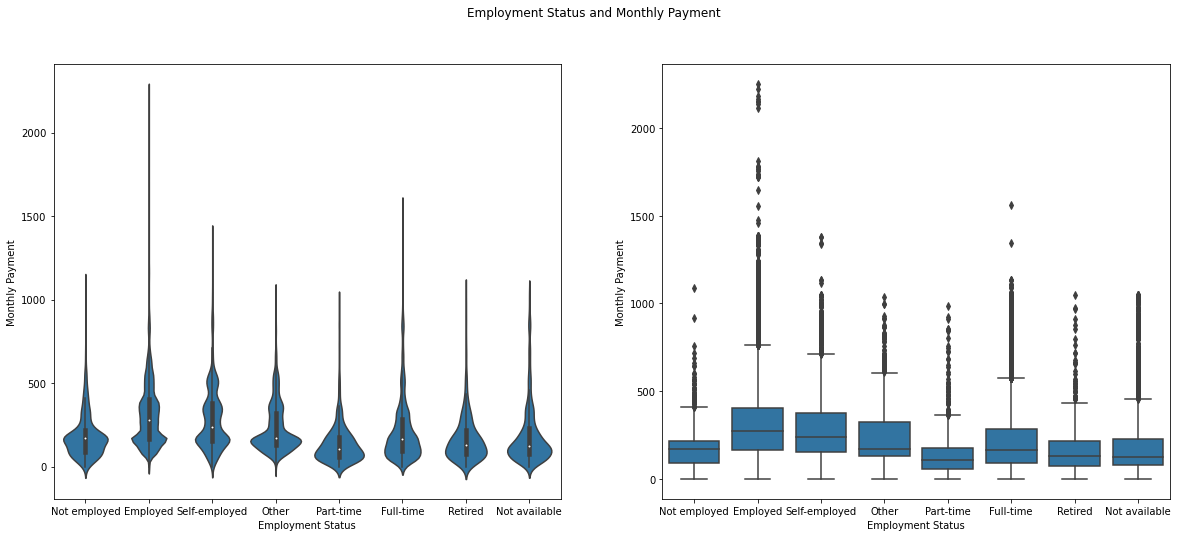

In [59]:
employment_statuses = ['Not employed','Employed','Self-employed','Other','Part-time','Full-time','Retired','Not available']
statuses = pd.api.types.CategoricalDtype(ordered=True,categories=employment_statuses)
loan['EmploymentStatus'] =loan['EmploymentStatus'].astype(statuses)

fig = plt.figure(figsize=[20,8])
plt.subplot(121)
plt.suptitle('Employment Status and Monthly Payment')
sb.violinplot(data=loan,x='EmploymentStatus',y='MonthlyLoanPayment',color=color)
plt.xlabel('Employment Status')
plt.ylabel('Monthly Payment')
# plt.xticks(rotation=60)

plt.subplot(122)
sb.boxplot(data=loan,x='EmploymentStatus',y='MonthlyLoanPayment',color=color)
plt.xlabel('Employment Status')
plt.ylabel('Monthly Payment')
# plt.xticks(rotation=60);

#### Employed borrower have a more diverse monthly payment ranging from very low to very high compared to not employed ones who mostly have a low monthly payment

### Employment Status and Loan Status

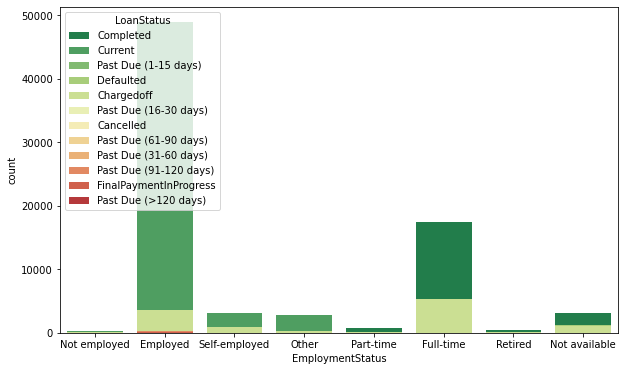

In [168]:
color=['green','blue','yellow','pink','cyan','gold','silver','red','red','red','green','red']
fig = plt.figure(figsize=[10,6])
sb.countplot(x=loan['EmploymentStatus'],hue=loan['LoanStatus'],dodge=False,palette='RdYlGn_r');
# plt.xticks(rotation=60);

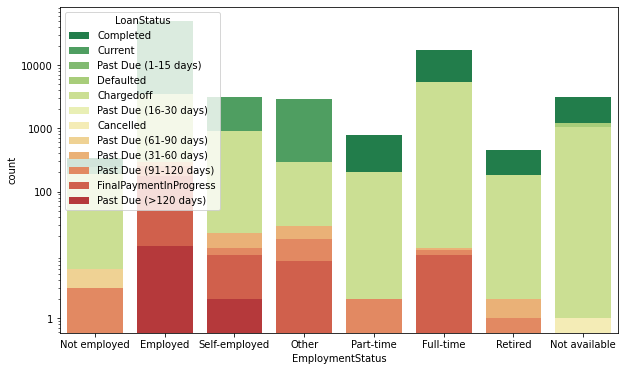

In [169]:
color=['green','blue','yellow','pink','cyan','gold','purple','red','red','red','green','red']
fig = plt.figure(figsize=[10,6])
sb.countplot(x=loan['EmploymentStatus'],hue=loan['LoanStatus'],dodge=False,palette='RdYlGn_r')
plt.yscale('log')
plt.yticks([1,100,1000,10000],['1','100','1000','10000']);
# plt.xticks(rotation=60);

###### Relationship between EmploymentStatus and LoanStatus

In [156]:
ct = loan.groupby(['EmploymentStatus','LoanStatus']).size()

In [157]:
ct = ct.reset_index(name='count')

In [158]:
ct = ct.pivot(index='EmploymentStatus',columns='LoanStatus',values='count')

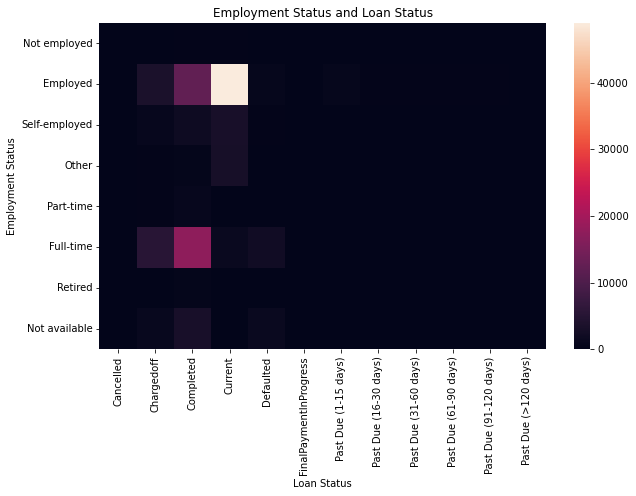

In [159]:
fig = plt.figure(figsize=(10,6))
sb.heatmap(ct)
plt.title('Employment Status and Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Status');

#### Relationship between Occupation and Loan Status

In [45]:
loan.Occupation.value_counts()

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [46]:
loan.Occupation.nunique()

67

In [47]:
loan.Occupation = loan.Occupation.fillna('Not_Available')  #replace na with Not_Available

In [48]:
loan_st_count = loan.groupby(['Occupation','LoanStatus']).size()   #groupby occupation and loanstatus

In [49]:
loan_st_count = loan_st_count.reset_index(name='count')

In [50]:
loan_st_count = loan_st_count.pivot(index='Occupation',columns='LoanStatus',values='count')

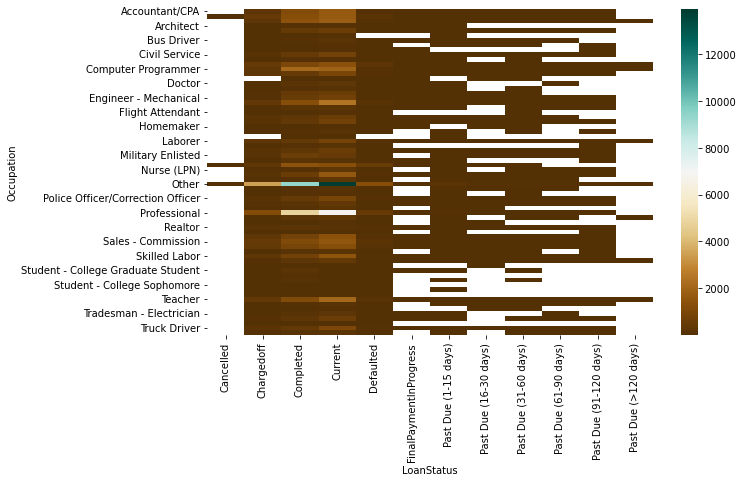

In [160]:
fig = plt.figure(figsize=[10,6])
sb.heatmap(loan_st_count,cmap='BrBG');

##### Loan Status and Debt to Income Ratio 

C:\Users\cruda\AppData\Local\Temp/ipykernel_2052/4171813588.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1.8)


Text(0, 0.5, 'Debt to Income Ratio')

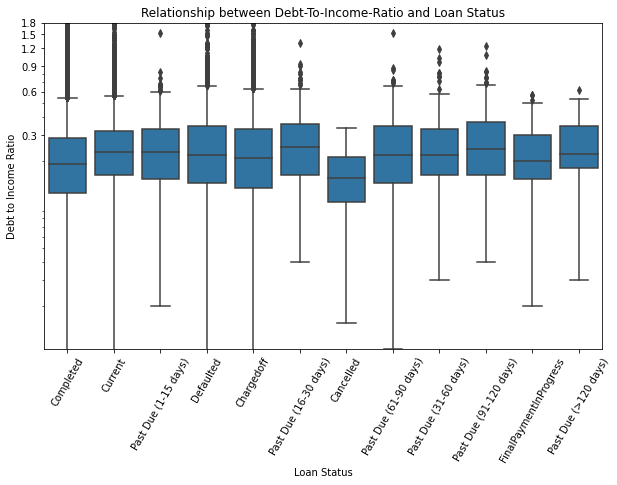

In [161]:
fig = plt.figure(figsize=[10,6])
color = sb.color_palette()[0]
sb.boxplot(data=loan,x='LoanStatus',y='DebtToIncomeRatio',color=color,hue_order=loan_status_order)
plt.xticks(rotation=60);
plt.yscale('log')

ticks = [0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4]
labels = ['{}'.format(v) for v in ticks]

plt.title('Relationship between Debt-To-Income-Ratio and Loan Status')
plt.xlabel('Loan Status')
plt.yticks(ticks,labels)
plt.ylim(0,1.8)
plt.ylabel('Debt to Income Ratio')

#### Observation: Apart from those that cancelled their loan, borrowers who completed their loan have the lowest DebtToIncomeRatio.

### Relationship between LoanOriginalAmount and Term

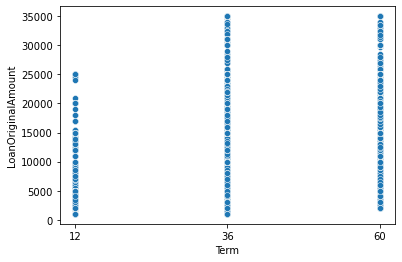

In [72]:
sb.scatterplot(data=loan,x='Term',y='LoanOriginalAmount')
plt.xticks(ticks=[12,36,60],labels=[12,36,60]);


##### Observation: There is postive correlation between Loan amount and Term, up to 25000

   ### Relationship between MonthlyPayment and Term

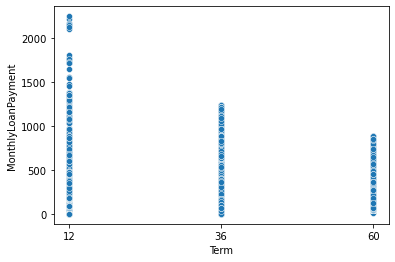

In [80]:
sb.scatterplot(data=loan,x='Term',y='MonthlyLoanPayment',)
plt.xticks(ticks=[12,36,60],labels=[12,36,60]);

#### Observation: Monthly payment negative correlaion with Term

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

### Relationship between BorrowerRate and BorrowerAPR
This relationship was plotted using a scattered plot. It can be seen that the two variables have a positive correlation between them, as BorrowerRate increases, the BorrowerAPR also increases

### Relationship between LoanAMount and Term
The relationship was plotted on a scattered plot and it was obvious that the larger the loan amount, the higher the term of payment.

### Home ownership of each employment categories
I plotted this relationship using a clustered bar chart.
It can be deduced that majority of borrrowe who owned a house were employees compared to much less number of self employed borrower.
Also, more full-time borrowers owned a home compare to the part-time counter-parts.

### Relationship between MonthlyPayment and EmploymentStatus
The rlationship was plotted using the boxplot.
It was oserved that employed borrower had the highest monthly payments and the monthly payments range from low to very high instead of concentrating in the lower range for unemployed borrowers

### Relationship between LoanStatus and ListingCategory
I observed that majority of borrowers who had completed their loan or currently servicing it are listed as either as Debt consolidation,Home Improvement or Business . The same applies to those in the early days of default.
Most of those who defaulted or charged off


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The relationship between MonthlyPayment and Term is a little interesting. I expect the monthly payment to be inversely related to the Term but my plot is indicating a slightly positive correlation between both variables. Perphaps, borrowers who choose a higher monthly payment end up defaulting for a long period of time.


## Multivariate Exploration


#### Relationship between AmountDelinquent,LoanStatus and IncomeRange

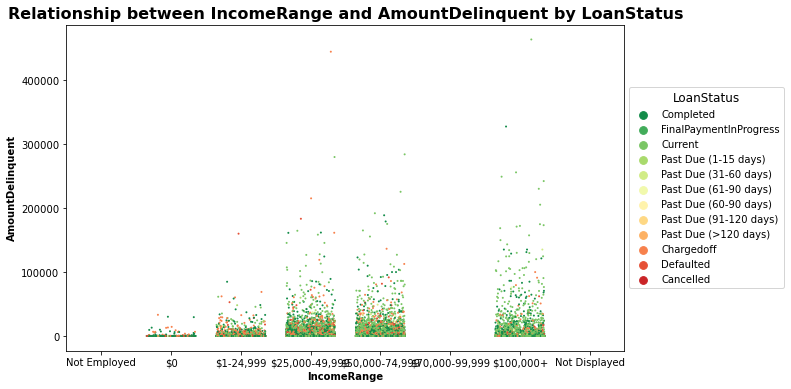

In [26]:
plot_scatter(loan,'IncomeRange','AmountDelinquent','LoanStatus',income_order,loan_status_order);

#### Observation: Most of the current borrowers are high income earners
#### There seems to be no connection between IncomeRange and LoanStatus

### Relationship between CreditGrade,LoanStatus and DebtToIncomeRatio

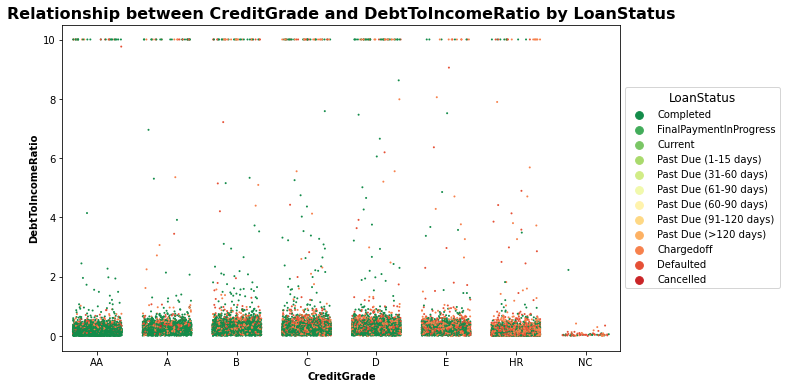

In [27]:
plot_scatter(loan,'CreditGrade','DebtToIncomeRatio','LoanStatus',CreditGrade_order,loan_status_order)

#### Observation: Borrowers who have a low DebtToIncomeRatio have a better CreditGrade and mostly completed their loan more than any other groups

### Relationship between CurrentCreditLines,LoanStatus and DebtToIncomeRatio

In [28]:
loan.CurrentCreditLines.nunique()

54

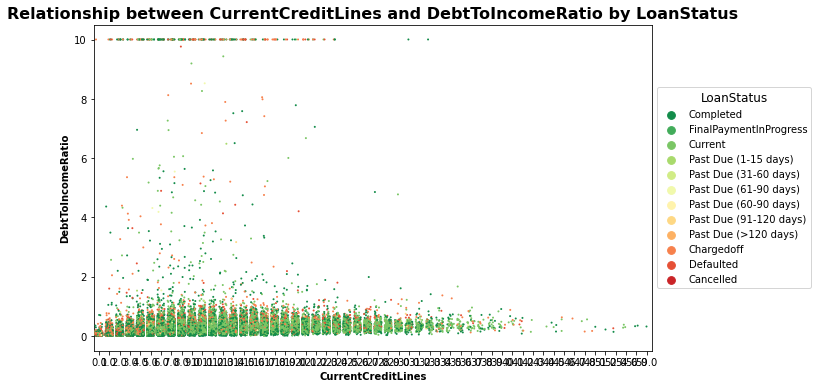

In [14]:
plot_scatter(loan,'CurrentCreditLines','DebtToIncomeRatio','LoanStatus',None,loan_status_order)

#### Observation: It seems CurrentCreditLines is not connected with loan status and DebtToIncomeRatio

#### Relationship between BorrowerRate, LoanOriginalAmount and LoanStatus

In [18]:
loan['BorrowerRate_cat'] = (((loan['BorrowerRate']*100)//5)/20)

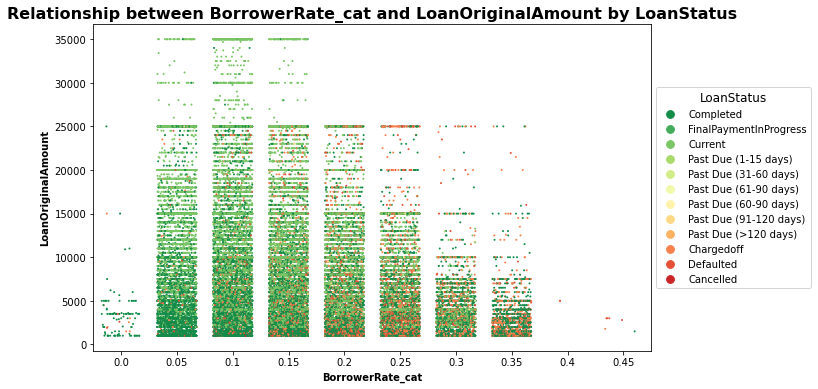

In [35]:
plot_scatter(loan,'BorrowerRate_cat','LoanOriginalAmount','LoanStatus',None,loan_status_order)

#### Observation: Borrowers with loans less than 10,000 at less than 0.2 interest rate seem to complete their payment more.
#### most current borrowers have a high loan amount.

#### Relationship between BorrowerRate,LoanStatus and OriginalAmount

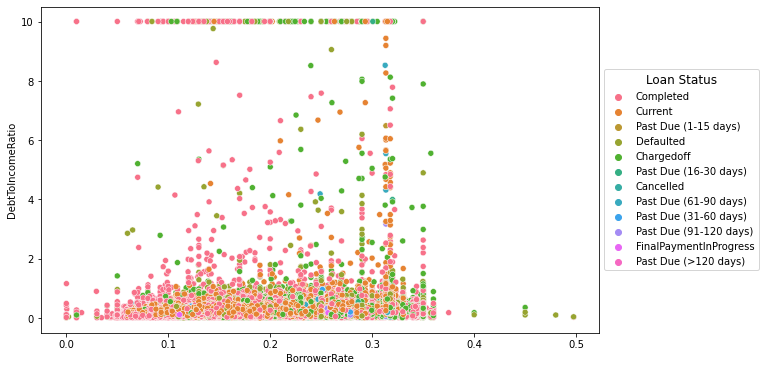

In [25]:
fig = plt.figure(figsize=(10,6))
sb.scatterplot(data=loan,x='BorrowerRate',y='DebtToIncomeRatio',hue='LoanStatus',)
plt.legend(loc='center left',bbox_to_anchor=(1,0.5),title='Loan Status',title_fontsize=12);

#### Relationship between LoanStatus,MonthlyPayment and EmploymentStatus

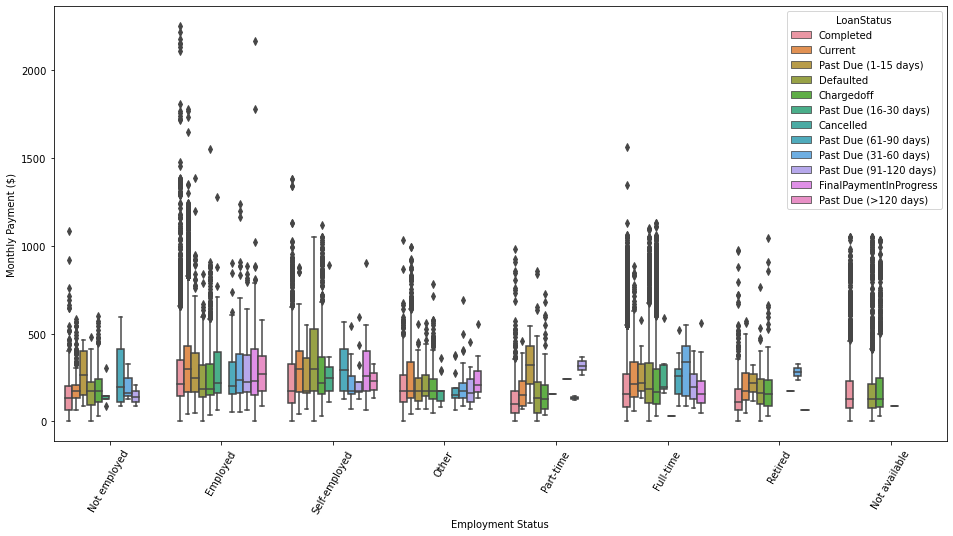

In [98]:
fig = plt.figure(figsize=[16,8])
sb.boxplot(data=loan,x='EmploymentStatus',y='MonthlyLoanPayment',hue='LoanStatus')
plt.xlabel('Employment Status')
plt.ylabel('Monthly Payment ($)')
plt.xticks(rotation=60);

### Relationship between LoanOriginalAmount, IncomeRange and Term

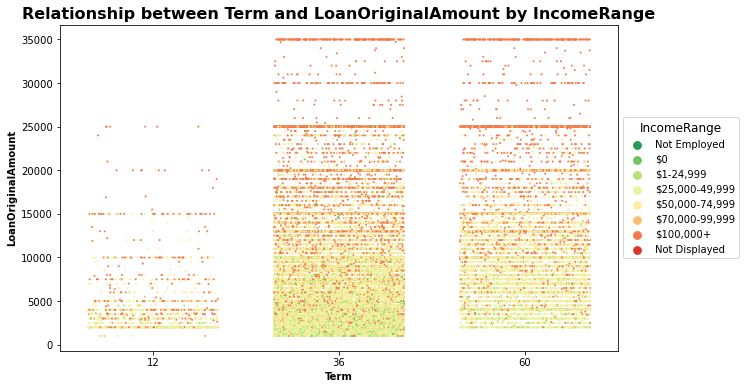

In [48]:
plot_scatter(loan,'Term','LoanOriginalAmount',hue_var='IncomeRange',hue_order=income_order)

#### Observation: Borrowers earning 25,000 to 75,000 usually do not borrow more than 25,000
#### LoanOriginalAmount does not seem to be connected with Term. It seems to be choosen by the borrowers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


Considering the relationship between CreditGrade,LoanStatus and DebtToIncomeRatio, I can deduce that borrowers who are either servicing their loan,completed their payment or in the final payments have a relatively low debt-to-income-ratio and have a credit grade around AA,A,B,C and D, which looks like a good credit grade. Most of borrowers who defaulted have a reatively high debt-to-income-ratio with creditGrade around E,HR and NC.

Relationship between BorrowerRate, DebtToIncomeRatio and LoanStatus

I observed that most borrowers who have a borrower rate aroound 0.2 and a debt to income ration around 2 either completed their loan, in the final payment or currently servicing it. Most defaulters have a borrower rate close to 0.3 or debt to income ratio close to 3.

Relationship between CurrentCreditLines,LoanStatus and DebtToIncomeRatio
Most of borrowers who have completed their payment or currently servicing the loan have credit line below 20, which is quite similar to those whose loan have been charged off.Both of these groups also have relatively low debt to income ratio.

Relationship between BorrowerRate, LoanOriginalAmount and LoanStatus
Most defaulters and charged off loans are located in the borrower rate region greater than 0.25, throughout the original loan amount. Whereas, those who completed their loan or are currently paying or in the final payments have borrower rate lower. It is suprisig that most current borrower borrowed more than 10000 with some as high as 35000

### Were there any interesting or surprising interactions between features?
In the relationship between LoanStatus,MonthlyPayment and EmploymentStatus, it seem most of the borrowers who defaulted across all employment status, have a high monthly payment.

## Conclusions

At this stage, I have noticed that the LoanStatus, which I have identified as an indication of ability of the borrower to pay back the loan depends on a number of other variables:
BorrowerRate
DebtToIncomeRatio
CreditGrade

Suprisingly The LoanOriginalAmount and Term appear not to affect LoanStatus.
